<a href="https://colab.research.google.com/github/dmswl0707/Sodescar/blob/eunji/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/socar_reservation_triplog.csv')
data = data.sample(frac=1, random_state=0).reset_index(drop=True)
data.tail()

,reservation_id,car_id,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng,trip
751543,21898188,14857,eKhC4BDw20tThuDz7ddstf3fHfWcmWMfRqofBOGz3Ps=,경기도 고양시 일산동구,2019-03-28 00:36:38,2019-03-27 18:40:00,21,male,2017-02-27,342.0,False,코나,일산2동 주민센터 앞,경기 고양시 일산동구 중산동 1651,37.683109,126.779547,NaN,NaN,NaN,NaN,NaN,"경기도 고양시 덕양구,경기도 고양시 덕양구"
751544,23019737,14349,rQyQqdZ8j3ibds8yMWmDG6wvJsjf9sMW0tno5dOayZM=,울산광역시 남구,2019-05-17 12:21:20,2019-05-17 11:00:00,24,male,2015-01-12,1786.0,False,티볼리,우정유료주차장,울산 남구 삼산동 1481-10,35.536034,129.339783,TRANSFER_TERMINAL,TRANSFER_TERMINAL,COMMERCIAL_HOTSPOT,NaN,NaN,NaN
751545,22674225,5196,LfNftWCh2n1wAySNkx/LHKAmq9XT+KZckofO5sZSIyw=,서울특별시 강남구,2019-05-02 18:24:38,2019-05-02 12:00:00,33,male,2018-01-25,NaN,False,아반떼AD,블루밍하우스,서울 강남구 역삼동 718-11,37.500793,127.038963,TRANSFER_SUBWAY,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,NaN,NaN,경기도 시흥시
751546,23627837,6022,lQdD+3KuPo5dPaheZafrBcnDgNH/40yfqJyBJ15TkLY=,경기도 안양시 만안구,2019-06-14 00:22:37,2019-06-13 18:30:00,28,male,2015-06-22,6889.0,False,레이,성결대학교 공과대학 앞 주차장,경기 안양시 만안구 안양동 400-10 성결대학교,37.380102,126.929144,LIVING_VILLA,NaN,NaN,NaN,NaN,서울특별시 구로구
751547,21370466,11776,plvsZ2kKqfdyRIXMsDzG/Thn5YiYBrp+1AyrpL1GdFA=,서울특별시 강남구,2019-02-28 13:18:15,2019-02-28 09:50:00,22,male,2014-05-26,6512.0,False,더뉴레이,역삼역 8번출구(포스트빌)(운영종료),서울 강남구 역삼동 673-16,37.504271,127.039843,LIVING_VILLA,COMMERCIAL_HOTSPOT,TRANSFER_SUBWAY,NaN,NaN,"서울특별시 중구,서울특별시 성동구"


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751548 entries, 0 to 751547
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   reservation_id           751548 non-null  int64  
 1   car_id                   751548 non-null  int64  
 2   member_id_encrypted      751548 non-null  object 
 3   region                   751548 non-null  object 
 4   reservation_return_at    751548 non-null  object 
 5   reservation_start_at     751548 non-null  object 
 6   member_age               751548 non-null  int64  
 7   member_gender            699017 non-null  object 
 8   member_created_date      751548 non-null  object 
 9   member_total_distance    738010 non-null  float64
 10  is_vroom                 751548 non-null  bool   
 11  car_name                 751548 non-null  object 
 12  zone_name                750774 non-null  object 
 13  zone_address             751548 non-null  object 
 14  zone

In [45]:
# 결측치 제거
data = data.dropna()

In [46]:
user_data = data.drop(['reservation_id', 'zone_address', 'car_id', 'zone_name', 'zone_lat', 'zone_lng', 'reservation_created_lat', 'reservation_created_lng', 'zone_type1','zone_type2','zone_type3', 'trip', 'car_name'], 1)
user_data.head()

,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom
6,4ajKUi7NO5DK48QcNc0NL9h0pXzgz3KehGXod1D4dsk=,경기도 화성시,2019-11-08 13:15:58,2019-11-07 17:50:00,24,male,2019-05-03,1888.0,False
14,DW47WQIr0JDuo0nA9xmV8/fuZtXygkKAjc4h1V3pqac=,경기도 광명시,2019-09-26 12:40:04,2019-09-26 07:30:00,38,female,2017-02-14,5869.0,False
17,HDHnuvFaMd7RPvqqL2My8B9tberJkDVjU1LOqqMmN/I=,경기도 의정부시,2019-09-03 18:16:14,2019-09-03 16:30:00,32,male,2019-08-18,221.0,False
27,cSSOV3mE7n39mi/dZ6o2txOZkh9hsbiXANicifDElRM=,서울특별시 강남구,2019-08-25 13:28:30,2019-08-24 13:30:00,31,male,2014-08-03,3106.0,False
32,dwqOC0gWt9k632109ylHlypf8b0m4GhGy1HGIhxrgNg=,서울특별시 강서구,2019-11-16 16:00:06,2019-11-16 10:30:00,28,female,2016-09-18,188.0,False


# 1. 유저 정보
- 쏘카 이용자의 75%가 40세 이하, 평균 나이 31세 남성 운전자가 여자 운전자에 비해 4배 정도 많음
- 첫 가입 후 평균 2~3년정도 쏘카 서비스를 이용, 전체 이용자의 75% 정도가 10시간 이내 가량 이용함
- 전체 이용자의 75%가 6500km 정도 주행


In [47]:
# 임의의 컬럼 분석(나이 분포)
# 전체 연령의 50% 정도가 29세 정도
user_data['member_age'].describe()

count    124755.000000
mean         31.686089
std           8.815163
min          21.000000
25%          25.000000
50%          29.000000
75%          37.000000
max          78.000000
Name: member_age, dtype: float64

(array([6.4889e+04, 3.1672e+04, 1.5980e+04, 9.3850e+03, 2.3750e+03,
        4.3300e+02, 2.1000e+01]),
 array([21.        , 29.14285714, 37.28571429, 45.42857143, 53.57142857,
        61.71428571, 69.85714286, 78.        ]),
 <a list of 7 Patch objects>)

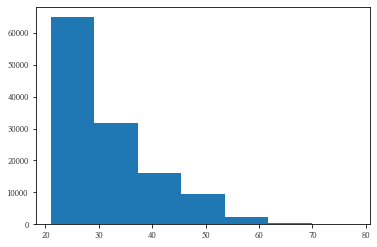

In [48]:
plt.hist(user_data['member_age'], bins=7)

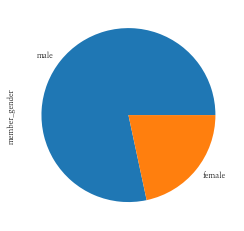

In [49]:
# 남자 이용자가 여자 이용자의 4배 가량 많음
user_data['member_gender'].value_counts(normalize=True).plot(kind="pie")

In [50]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
%matplotlib inline  

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [51]:
import matplotlib.font_manager as fm
from matplotlib import rc

font_list = [font.name for font in fm.fontManager.ttflist]
#font_list

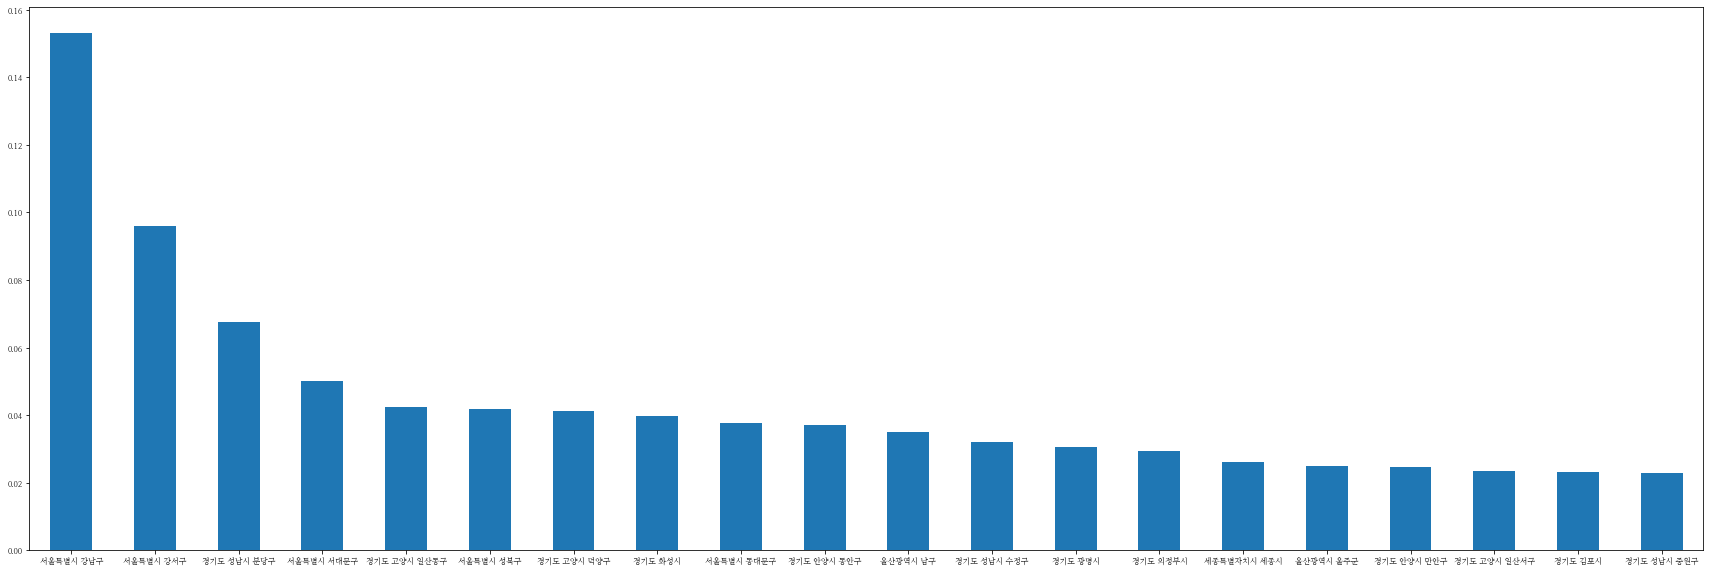

In [52]:
plt.rcParams['font.family'] = 'NanumMyeongjo'
plt.rc('font', size=8)

region_rate = user_data['region'].value_counts(normalize=True)

# 상위 20개 지역만 사용
top20_region=region_rate.nlargest(20)
#print(top20_region)
top20_region.plot.bar(rot=0, figsize=(30,10))

In [53]:
user_data['reservation_start_at'] = pd.to_datetime(user_data['reservation_start_at'])
user_data['reservation_return_at'] = pd.to_datetime(user_data['reservation_return_at'])
user_data['member_created_date'] = pd.to_datetime(user_data['member_created_date'])

user_data['연도']=user_data['reservation_start_at'].dt.year
user_data['월']=user_data['reservation_start_at'].dt.month

In [54]:
# 반납 시간 - 예약 시작 시간
# 전체 이용자 중의 75%가 10시간 이내
user_data['이용시간']=((user_data['reservation_return_at'] - user_data['reservation_start_at']))
user_data['이용시간'].describe()

count                       124755
mean     0 days 09:49:59.687603703
std      0 days 14:35:42.425974396
min                0 days 00:13:10
25%                0 days 03:20:46
50%                0 days 05:20:49
75%                0 days 10:28:12
max               15 days 00:08:22
Name: 이용시간, dtype: object

In [118]:
# 예약  시작  시간 - 회원가입  날짜
# 이용자의 절반이 가입후 2년 정도 사용
user_data['가입후_이용기간']=((user_data['reservation_start_at'] - user_data['member_created_date']))
user_data['가입후_이용기간'].describe()

count                         124755
mean     838 days 12:58:13.591919792
std      594 days 01:17:52.240760704
min                  0 days 00:30:00
25%                312 days 20:15:00
50%                787 days 10:20:00
75%               1308 days 13:30:00
max               2814 days 13:10:00
Name: 가입후_이용기간, dtype: object

In [119]:
# 이용자별 주행거리
# 평균 5000km 사용, 이용자의 75%가 6545km 이용
# id당 누적 그래프 시각화 가능하나, 큰 의미는 없어 보임
# 예약만 하고 이용하지 않은 사람도 다수(제거 필요해보임)
user_data['member_total_distance'].describe()

count    124755.000000
mean       5004.255348
std        7084.237631
min           0.000000
25%         827.000000
50%        2534.000000
75%        6545.000000
max      121163.000000
Name: member_total_distance, dtype: float64

In [121]:
# 멤버당 이용 횟수
usage_frequency_per_member = user_data['member_id_encrypted'].value_counts()
print(usage_frequency_per_member)

user_data['usage_frequency_per_member'] = usage_frequency_per_member


MRo1KLaA/jViPznvtnLB/tHLuvX3XjHsk2dlDkiPfZM=    95
+ofceBEd7+aPZE6tmux2xNxppZMqRx4rf8Uf88sVLgI=    79
OuIBb1HQX5uBh/9gCv5q/ToOjLMh/7E1/UBXEu5rvrE=    79
MGKifPpgs6UKyZhi9LEqHKO9MckfSlKq1PPQF+QVHko=    63
xk4mrfLC8oDn8WKckTAngD4ZvbWgatwpUuk5D7bxAHo=    60
                                                ..
ea/C1zIZcNOeUuqghrWpzN8SKxA8BvWIgIlgDu3dHWg=     1
fAsW2Hjc+j8eULBC6nMUKqyxX/JwIQAkRmjfevS9dno=     1
w2PWEde9m7bxbC0gisIr4WSrb3fRw0We7Jdz5ApN9+I=     1
5S6HK9IQtQPkD9/DYbkDD+P/HOYwmRAf8mEjOa8L4bw=     1
Pgcp25fmH3d4WG70gMAbWFNrk1aAg24UsmAMnZQVJW4=     1
Name: member_id_encrypted, Length: 59907, dtype: int64


([<matplotlib.patches.Wedge at 0x7fe41a8b43d0>,
 [Text(1.0999999984874587, 5.768527765406171e-05, '95'),
  Text(1.0999999757993364, 0.00023074110902985819, '79'),
  Text(1.0999999258854682, 0.0004037969346946556, '63'),
  Text(1.0999998774841422, 0.0005191674798498919, '60'),
  Text(1.0999998169824858, 0.0006345380192941293, '59'),
  Text(1.0999997443804994, 0.000749908551758257, '57'),
  Text(1.099999659678184, 0.0008652790759731644, '52'),
  Text(1.0999994539725764, 0.0010960200882929034, '50'),
  Text(1.099999128776237, 0.0013844462862561797, '49'),
  Text(1.0999988973574615, 0.001557501964386859, '48'),
  Text(1.0999986387129665, 0.0017305576039683074, '47'),
  Text(1.0999983528427586, 0.001903613200717281, '46'),
  Text(1.0999981471372275, 0.0020189835726389283, '45'),
  Text(1.0999979293313848, 0.002134353922351147, '43'),
  Text(1.0999973318779317, 0.0024227796911369197, '42'),
  Text(1.0999965151062967, 0.0027688903920615386, '41'),
  Text(1.0999960658819832, 0.0029419456418675

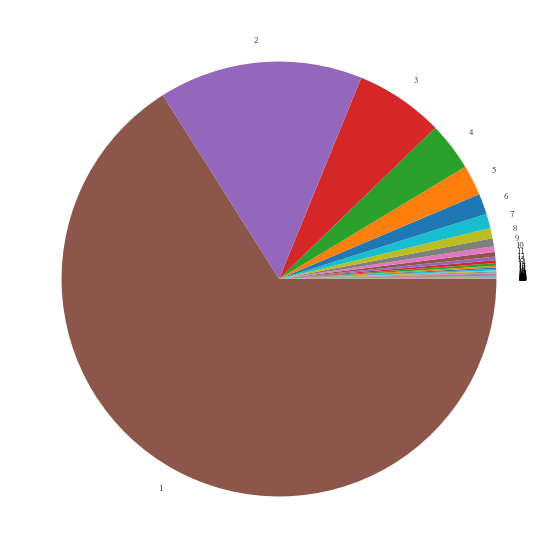

In [128]:
#딕셔너리화 해서 파이 차트로 구현
usage_frequency_dict = dict(usage_frequency_per_member)

# 새로운 딕셔너리 생성 key : 횟수, value : 중복된 수
count = {}
new_key = list(usage_frequency_dict.values())

for i in new_key:
    try : count[i] += 1
    except : count[i] = 1

#print(count)
plt.figure(figsize=(10,10))
plt.pie(count.values(), labels=count.keys())

#평균, 최대, 최소값으로 의미 추출 가능해보임

In [129]:
# 이용 횟수가 10회 미만인 행 제거
# + 이용시간 10분 이내도 제거
# + 주행거리 0도 제거
frequency1 = user_data[user_data['usage_frequency_per_member']<10].index
frequency1
#user_data.drop(frequency1)

Int64Index([], dtype='int64')

In [122]:
# Nan 문제 ...
user_data.head(3)

,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,연도,월,이용시간,가입후_이용기간,usage_frequency_per_member
6,4ajKUi7NO5DK48QcNc0NL9h0pXzgz3KehGXod1D4dsk=,경기도 화성시,2019-11-08 13:15:58,2019-11-07 17:50:00,24,male,2019-05-03,1888.0,False,2019,11,0 days 19:25:58,188 days 17:50:00,NaN
14,DW47WQIr0JDuo0nA9xmV8/fuZtXygkKAjc4h1V3pqac=,경기도 광명시,2019-09-26 12:40:04,2019-09-26 07:30:00,38,female,2017-02-14,5869.0,False,2019,9,0 days 05:10:04,954 days 07:30:00,NaN
17,HDHnuvFaMd7RPvqqL2My8B9tberJkDVjU1LOqqMmN/I=,경기도 의정부시,2019-09-03 18:16:14,2019-09-03 16:30:00,32,male,2019-08-18,221.0,False,2019,9,0 days 01:46:14,16 days 16:30:00,NaN


<Figure size 1440x1440 with 0 Axes>

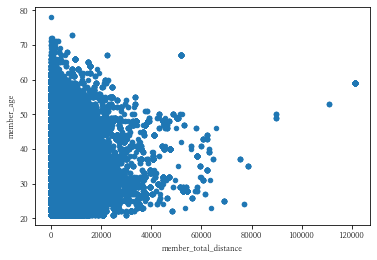

In [127]:
plt.figure(figsize=(20,20))
user_data.plot(x='member_total_distance', y='member_age', kind='scatter')

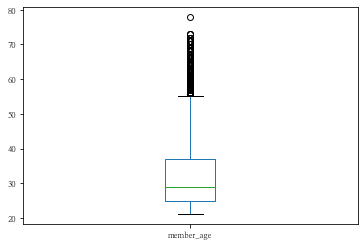

In [130]:
# 50대 이상은 이상치로 분류
# 3분위 약 35세, 2분위 27세, 1분위 21세
user_data['member_age'].plot(kind='box')

- 예약 주기
- 차종 구분
- trip log 추출

# 2. Trip 정보

In [26]:
df = data[['region', 'car_name', 'zone_type1', 'zone_type2','zone_type3','trip','이용시간']]
df.tail()

,region,car_name,zone_type1,zone_type2,zone_type3,trip,이용시간
124750,서울특별시 강서구,[쏘카세이브] 넥스트스파크,LIVING_VILLA,LIVING_ETC,ETC,"서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,경기도 하남시",0 days 05:52:10
124751,서울특별시 동대문구,더뉴레이,LIVING_ETC,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,서울특별시 중구,0 days 09:59:04
124752,서울특별시 강남구,스토닉,LIVING_VILLA,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,"서울특별시 강남구,서울특별시 강남구,서울특별시 강남구,경기도 양주시,경기도 파주시,...",0 days 10:49:23
124753,경기도 고양시 일산서구,올뉴모닝,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,"경기도 고양시 일산서구,경기도 파주시,경기도 파주시,경기도 안양시 동안구,경기도 안...",0 days 22:14:40
124754,서울특별시 강남구,코나,LIVING_APT,TRANSFER_BUS,ETC,"서울특별시 강남구,강원도 강릉시,강원도 속초시,강원도 양양군,강원도 홍천군,강원도 ...",1 days 15:01:09


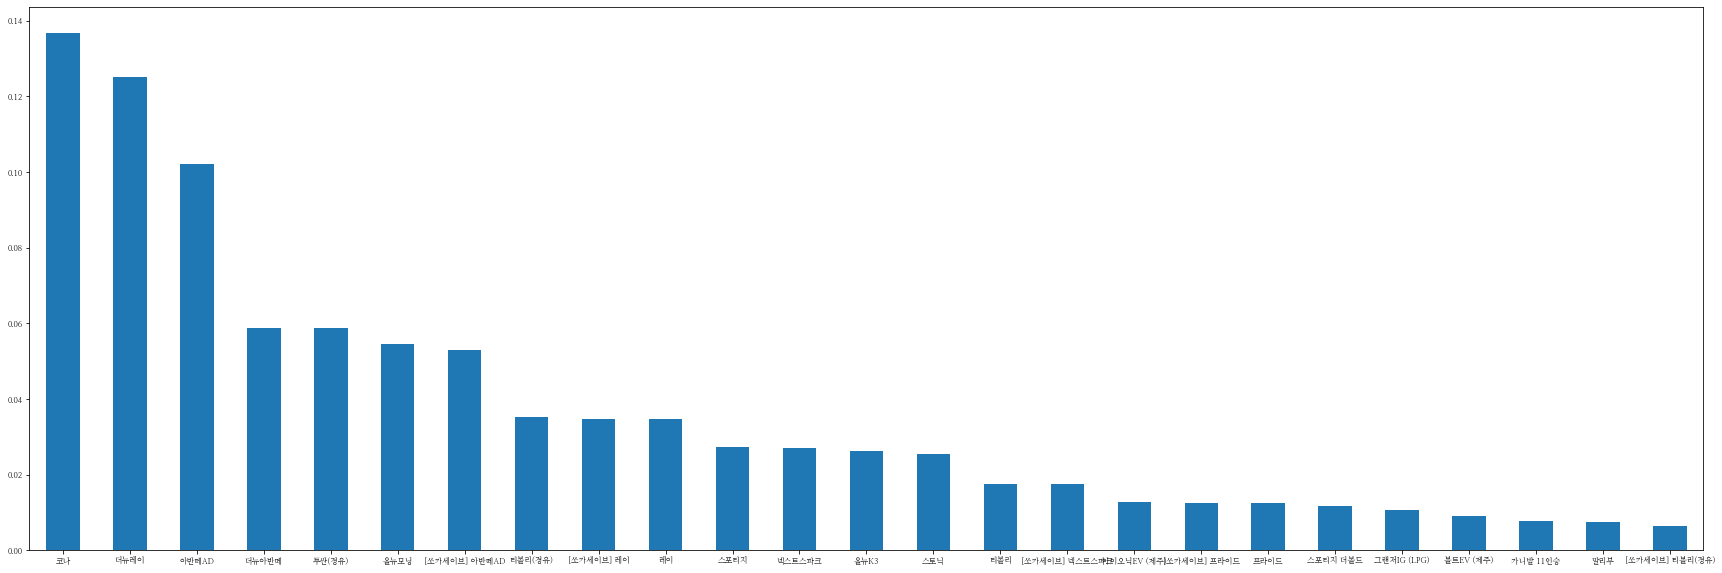

In [31]:
# 차종 총 50개
car_rate = data['car_name'].value_counts(normalize=True)
#print(len(car_rate))
top25_car=car_rate.nlargest(25)
top25_car.plot.bar(rot=0, figsize=(30,10))


# 소/중/대 분류 필요

(array([4.6836e+04, 6.7440e+03, 1.7468e+04, 1.5909e+04, 2.9224e+04,
        1.7370e+03, 3.0430e+03, 9.2900e+02, 1.6780e+03, 1.5900e+02,
        9.7400e+02, 4.9000e+01, 5.0000e+00]),
 array([ 0.        ,  0.92307692,  1.84615385,  2.76923077,  3.69230769,
         4.61538462,  5.53846154,  6.46153846,  7.38461538,  8.30769231,
         9.23076923, 10.15384615, 11.07692308, 12.        ]),
 <a list of 13 Patch objects>)

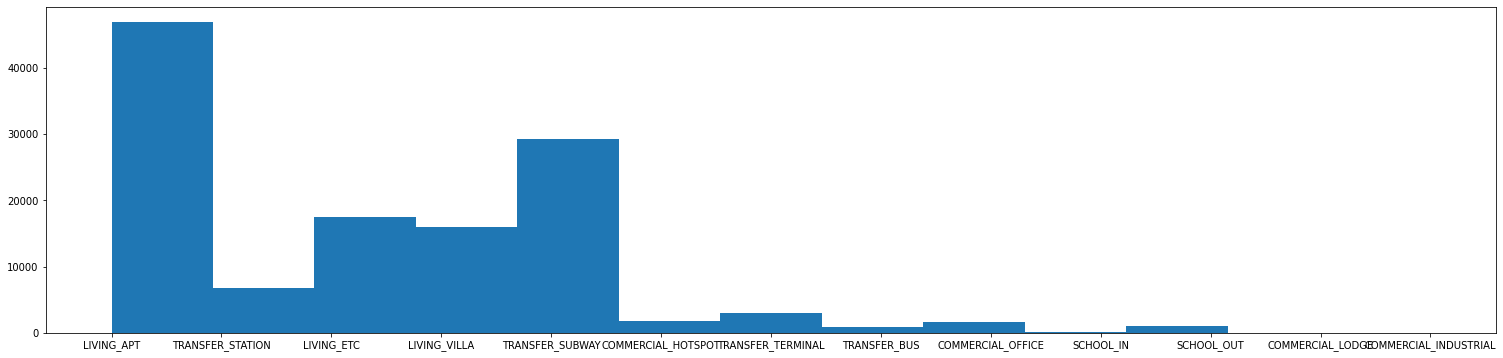

In [ ]:
# 사용자가 이용하는 존 타입 유형 3
plt.figure(figsize=(26, 6))
plt.hist(data['zone_type1'], bins=13)

(array([15783.,  7273., 22847.,  8194., 20700., 25055.,     0.,  5714.,
        12023.,  2912.,  1853.,  1512.,   738.,   151.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ,  6.85714286,  7.71428571,
         8.57142857,  9.42857143, 10.28571429, 11.14285714, 12.        ]),
 <a list of 14 Patch objects>)

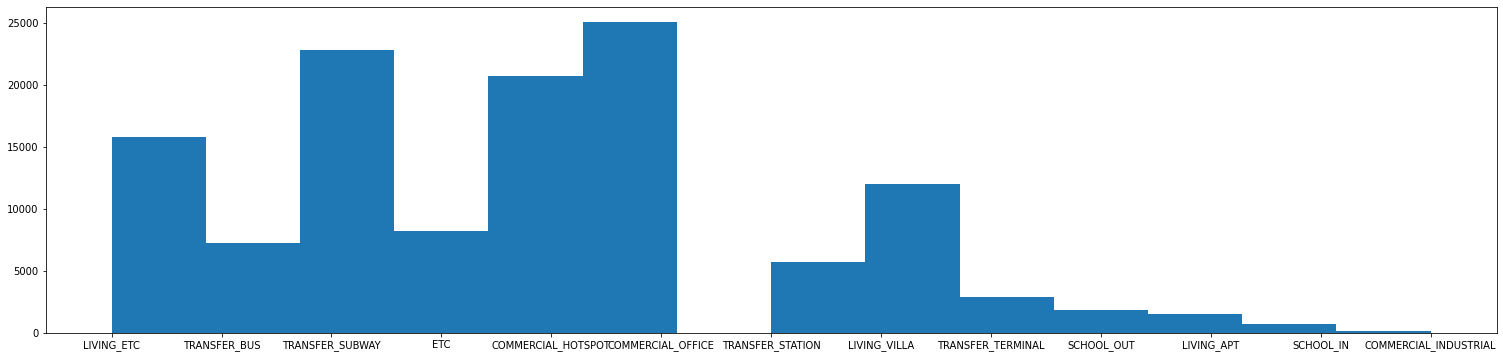

In [ ]:
plt.figure(figsize=(26, 6))
plt.hist(data['zone_type2'], bins=14)

(array([ 2824., 41566., 50910.,  6327.,  9074.,  4539.,  3278.,   592.,
         2039.,  1393.,   572.,   250.,   539.,   852.]),
 array([ 0.        ,  0.92857143,  1.85714286,  2.78571429,  3.71428571,
         4.64285714,  5.57142857,  6.5       ,  7.42857143,  8.35714286,
         9.28571429, 10.21428571, 11.14285714, 12.07142857, 13.        ]),
 <a list of 14 Patch objects>)

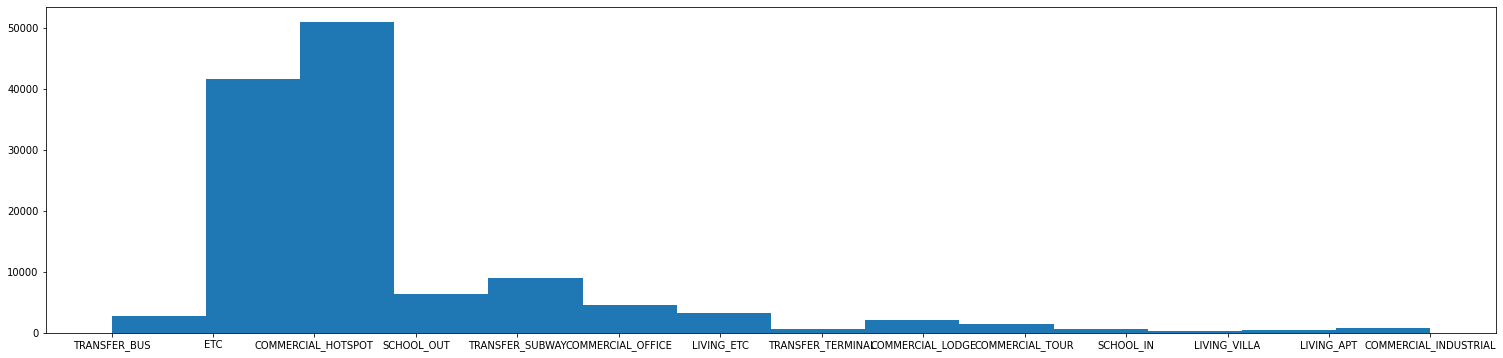

In [ ]:
plt.figure(figsize=(26, 6))
plt.hist(data['zone_type3'], bins=14)

In [ ]:
data.shape

(124755, 21)

In [ ]:
# train 부분은 80%, test 부분은 20%
train = data[:670000]
test = data[67000:]

In [ ]:
x_train = np.asarray()
y_train = np.asarray()
x_test = np.asarray()
y_test = np.asarray()